# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Configuring url structure
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
city_name = []
country = []
lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []

# setting up counter for printing log of city info
number = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        city_data = requests.get(query_url + city).json()
        city_name.append(city_data['name'])
        country.append(city_data['sys']['country'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        wind_speed.append(city_data['wind']['speed'])
        cloudiness.append(city_data['clouds']['all'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    except KeyError:
        print(f'There is missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1


City number 1 of 589 complete. | Added hermanus
City number 2 of 589 complete. | Added kaitangata
City number 3 of 589 complete. | Added fianarantsoa
City number 4 of 589 complete. | Added barrow
City number 5 of 589 complete. | Added espanola
City number 6 of 589 complete. | Added mataura
City number 7 of 589 complete. | Added klaksvik
City number 8 of 589 complete. | Added souillac
City number 9 of 589 complete. | Added albany
City number 10 of 589 complete. | Added fortuna
City number 11 of 589 complete. | Added huarmey
City number 12 of 589 complete. | Added avarua
City number 13 of 589 complete. | Added breznita-motru
City number 14 of 589 complete. | Added east london
City number 15 of 589 complete. | Added saint-philippe
City number 16 of 589 complete. | Added tuktoyaktuk
City number 17 of 589 complete. | Added bredasdorp
There is missing data in city number 18 of 589. | Skipping vaitupu
There is missing data in city number 19 of 589. | Skipping aflu
City number 20 of 589 comple

There is missing data in city number 161 of 589. | Skipping saleaula
City number 162 of 589 complete. | Added ponta do sol
City number 163 of 589 complete. | Added rockford
City number 164 of 589 complete. | Added hargeysa
City number 165 of 589 complete. | Added kruisfontein
City number 166 of 589 complete. | Added codrington
There is missing data in city number 167 of 589. | Skipping samusu
City number 168 of 589 complete. | Added roncesvalles
City number 169 of 589 complete. | Added tevaitoa
City number 170 of 589 complete. | Added dunedin
City number 171 of 589 complete. | Added rafai
City number 172 of 589 complete. | Added ivaipora
City number 173 of 589 complete. | Added pochutla
City number 174 of 589 complete. | Added yulara
City number 175 of 589 complete. | Added palatka
City number 176 of 589 complete. | Added novotroitskaya
City number 177 of 589 complete. | Added smithers
City number 178 of 589 complete. | Added jamestown
City number 179 of 589 complete. | Added lipin bor

City number 320 of 589 complete. | Added nishihara
City number 321 of 589 complete. | Added marrakesh
City number 322 of 589 complete. | Added kasempa
City number 323 of 589 complete. | Added bandar
City number 324 of 589 complete. | Added jeremie
City number 325 of 589 complete. | Added shanhetun
City number 326 of 589 complete. | Added isangel
City number 327 of 589 complete. | Added damaturu
City number 328 of 589 complete. | Added kununurra
City number 329 of 589 complete. | Added dir
City number 330 of 589 complete. | Added half moon bay
City number 331 of 589 complete. | Added mattru
City number 332 of 589 complete. | Added ancud
City number 333 of 589 complete. | Added vidalia
There is missing data in city number 334 of 589. | Skipping wulanhaote
City number 335 of 589 complete. | Added barcelos
City number 336 of 589 complete. | Added lososina
City number 337 of 589 complete. | Added krasnyy chikoy
There is missing data in city number 338 of 589. | Skipping amderma
City number 

City number 480 of 589 complete. | Added puerto leguizamo
City number 481 of 589 complete. | Added koroni
City number 482 of 589 complete. | Added merauke
City number 483 of 589 complete. | Added cochabamba
City number 484 of 589 complete. | Added haines junction
City number 485 of 589 complete. | Added tiznit
City number 486 of 589 complete. | Added jiuquan
City number 487 of 589 complete. | Added pittsburg
City number 488 of 589 complete. | Added balkhash
City number 489 of 589 complete. | Added walvis bay
City number 490 of 589 complete. | Added malakal
City number 491 of 589 complete. | Added buraydah
City number 492 of 589 complete. | Added naspur
City number 493 of 589 complete. | Added chapais
There is missing data in city number 494 of 589. | Skipping tabiauea
City number 495 of 589 complete. | Added lata
City number 496 of 589 complete. | Added viedma
City number 497 of 589 complete. | Added noumea
City number 498 of 589 complete. | Added arman
City number 499 of 589 complete.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating city data DF
city_data_dict = {"City": city_name, 
                "Country" : country,
                "Latitude": lat,
                "Longitude": lng,
                "Temperature": temp, 
                "Humidity": humidity, 
                "Wind Speed": wind_speed,
                "Cloudiness": cloudiness}
city_data_df = pd.DataFrame(city_data_dict)

# Exporting city data to CSV
pd.DataFrame.to_csv(city_data_df, 'city_data.csv', index=False)

city_data_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Hermanus,ZA,-34.42,19.23,58.69,95,4.41,75
1,Kaitangata,NZ,-46.28,169.85,53.08,75,7.78,89
2,Fianarantsoa,MG,-21.43,47.08,59.90,70,5.26,99
3,Barrow,US,71.29,-156.79,-5.80,83,12.75,1
4,Española,US,35.99,-106.08,66.96,16,11.41,1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

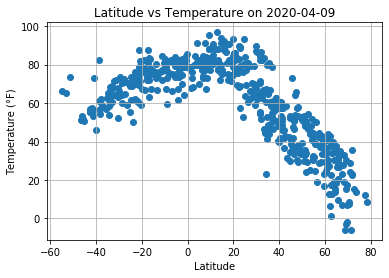

In [5]:
plt.scatter(lat, temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title(f"Latitude vs Temperature on {date.today()}")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

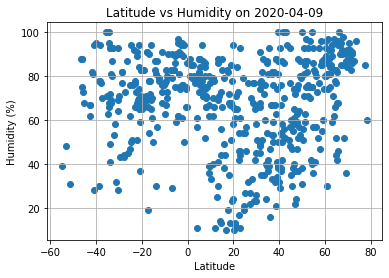

In [6]:
plt.scatter(lat, humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity on {date.today()}")
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

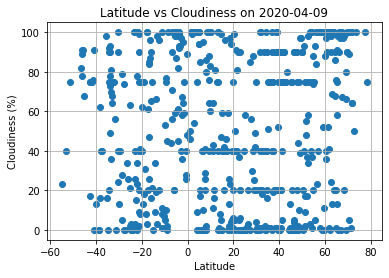

In [7]:
plt.scatter(lat, cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness on {date.today()}")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

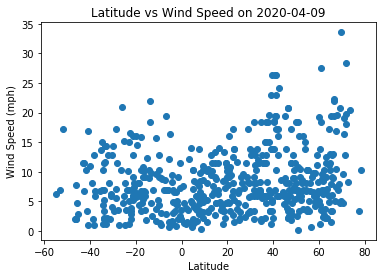

In [8]:
plt.scatter(lat, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Wind Speed on {date.today()}")
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames

# North hemisphere DF: getting all rows with latitude over 0
north_hemi = city_data_df.loc[city_data_df["Latitude"] > 0]

# South hemisphere DF: getting all rows with latitude under 0
south_hemi = city_data_df.loc[city_data_df["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

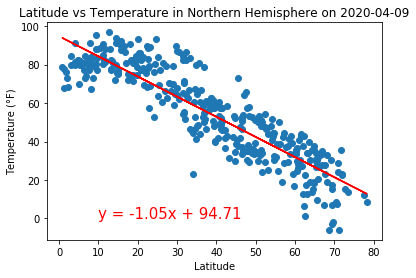

 The correlation coefficient is: 0.8012307686578051


In [11]:
nh_lat = north_hemi["Latitude"]
nh_temp = north_hemi["Temperature"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_temp)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title(f"Latitude vs Temperature in Northern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (10,0), fontsize=15, color="r")


plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

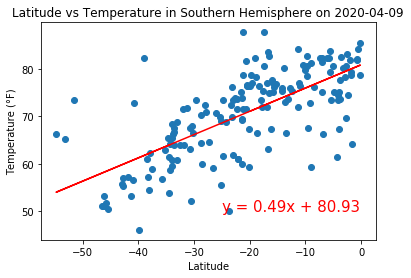

 The correlation coefficient is: 0.4834945947942943


In [12]:
sh_lat = south_hemi["Latitude"]
sh_temp = south_hemi["Temperature"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_temp)
regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title(f"Latitude vs Temperature in Southern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-25,50), fontsize=15, color="r")


plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

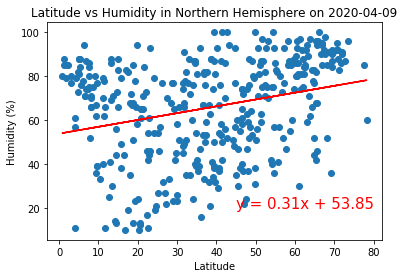

 The correlation coefficient is: 0.07658616758612392


In [13]:
nh_humidity = north_hemi["Humidity"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_humidity)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity in Northern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (45,20), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

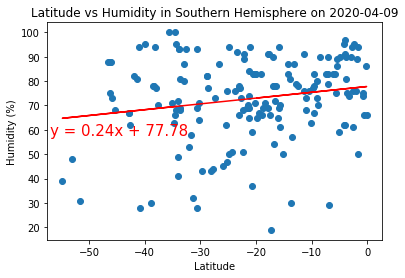

 The correlation coefficient is: 0.03473544349265713


In [20]:
sh_humidity = south_hemi["Humidity"]
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_humidity)

regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity in Southern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-57,58), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

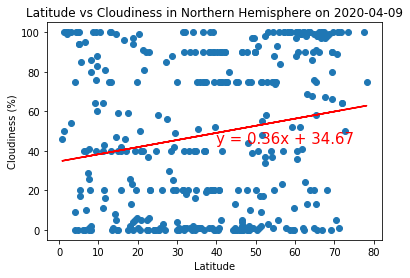

 The correlation coefficient is: 0.03542854171015081


In [15]:
nh_cloudiness = north_hemi["Cloudiness"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_cloudiness)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness in Northern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (40,44), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

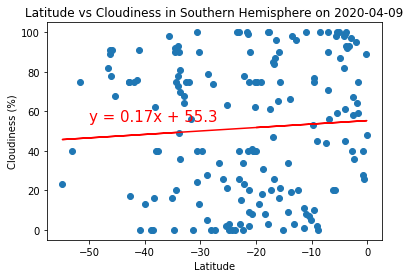

 The correlation coefficient is: 0.004508995452179481


In [16]:
sh_cloudiness = south_hemi["Cloudiness"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_cloudiness)
regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness in Southern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-50,55), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

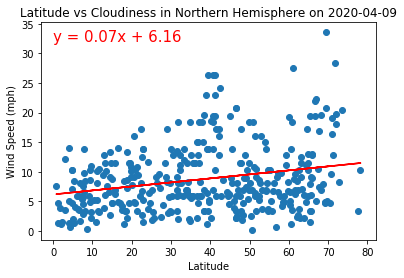

 The correlation coefficient is: 0.05902600426317827


In [17]:
nh_wind_speed = north_hemi["Wind Speed"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(nh_lat, nh_wind_speed)
regression_value = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nh_lat, nh_wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Cloudiness in Northern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(nh_lat, regression_value,"r-")
plt.annotate(line_eq, (0,32), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

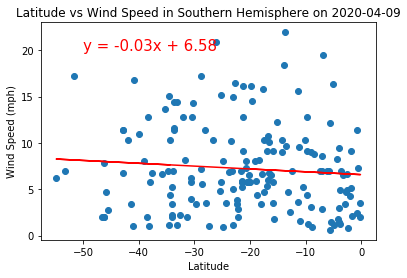

 The correlation coefficient is: 0.007431132900174237


In [18]:
sh_wind_speed = south_hemi["Wind Speed"]

# Setting up lin regression line
slope, intercept, rvalue, pvalue, stderr = linregress(sh_lat, sh_wind_speed)
regression_value = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(sh_lat, sh_wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Wind Speed in Southern Hemisphere on {date.today()}")

# Adding linear regression line
plt.plot(sh_lat, regression_value,"r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="r")

plt.show()

print(f" The correlation coefficient is: {rvalue**2}")
